<a href="https://colab.research.google.com/github/PLEX-GR00T/Cart_Pole_LQR/blob/main/Car_Pole_LQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
M = 1
m = 0.3
b = 0.1
l = 1
I = 0.001
g = 9.8

A = (I + (m*(l**2)))
B = (I*(M+m) + (M*m*(l)**2))
C = ((m**2)*g*(l**2))
D = (-m*l*b)
E = ((m*g*l)*(M+m))
f = (m*l)

AA = -A*b/B
BB = C/B
CC = D/B
DD = E/B

EE = A/B
FF = f/B

N = 1000

dt = 0.01

In [3]:
Tb = np.array([
            [0, 1,  0,  0],
            [0, AA, BB, 0],
            [0, 0,  0,  1],
            [0, CC, DD, 0]]) 

Ta = np.array([[0], 
              [EE], 
              [0], 
              [FF]]) *dt

Identity = np.identity(4, dtype = float)
Ts = Identity + (Tb) * dt

Ra = -2
rho = 10
sigma_val = 0.01
Rs = -np.array([[rho/20, 0, 0, 0],
                      [0, rho/20, 0, 0],
                      [0, 0, rho, 0],
                      [0, 0, 0, rho/10]])

In [4]:
sigma = np.identity(4) * sigma_val

v = dict()
q = dict()

v[N] = Rs
q[N] = 0

F = dict()
F[1] = 0
S = dict()
S[1] = np.array([[0.1], 
          [-0.05], 
          [0.1], 
          [0.01]])

L = dict()

In [5]:
for i in range(N, 1, -1):
  v[i-1] = Rs + (Ts.T @ v[i].T @ Ts) - ((Ta.T @ v[i] @ Ts).T) * ((Ra + Ta.T @ v[i] @ Ta)**(-1)) @ (Ta.T @ v[i] @ Ts)
  q[i-1] = q[i] + np.trace(sigma @ v[i])

for i in range(1, N+1, 1):
    L[i] = ((Ra + Ta.T @ v[i] @ Ta)**(-1)) @ (Ta.T @ v[i] @ Ts)
    F[i] = -(L[i] @ S[i])
    S[i+1] = Ts @ S[i] + Ta * F[i] #+ np.random.normal(0, sigma_val, 1)

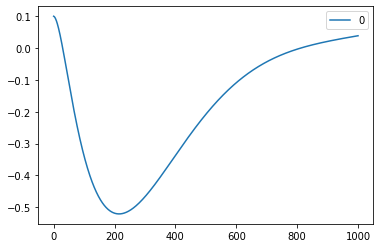

In [6]:
pd.DataFrame([float(S[i][0][0]) for i in S]).plot()

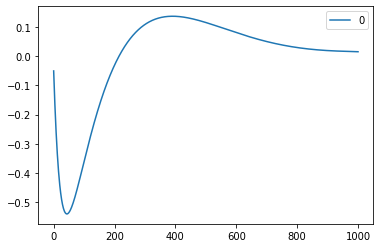

In [7]:
pd.DataFrame([float(S[i][1][0]) for i in S]).plot()

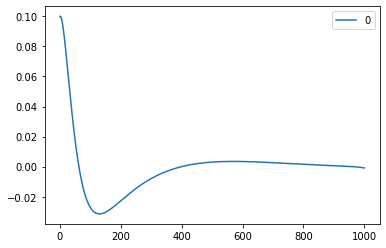

In [8]:
pd.DataFrame([float(S[i][2][0]) for i in S]).plot()

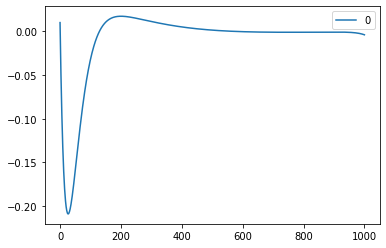

In [9]:
pd.DataFrame([float(S[i][3][0]) for i in S]).plot()

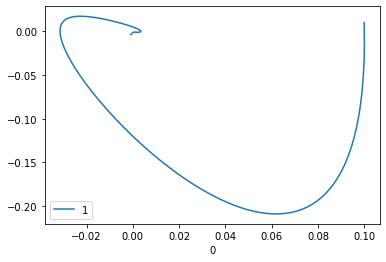

In [10]:
pd.DataFrame({'0':[float(S[i][2][0]) for i in S], '1':[float(S[i][3][0]) for i in S]}).plot('0','1')

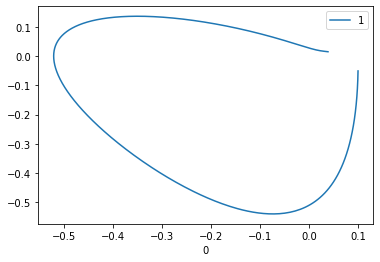

In [11]:
pd.DataFrame({'0':[float(S[i][0][0]) for i in S], '1':[float(S[i][1][0]) for i in S]}).plot('0','1')

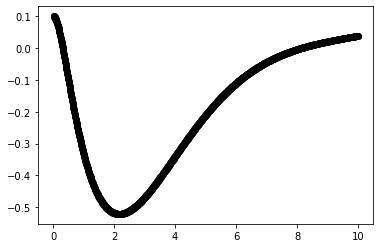

In [12]:
time = [dt*i for i in range(1,N+1)]
for i in range(1, N):
  plt.scatter(time[i], S[i][0], color = 'black')

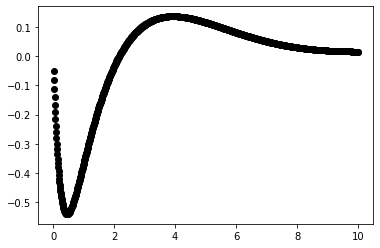

In [13]:
time = [dt*i for i in range(1,N+1)]
for i in range(1, N):
  plt.scatter(time[i], S[i][1], color = 'black')

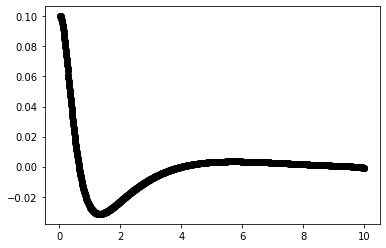

In [14]:
time = [dt*i for i in range(1,N+1)]
for i in range(1, N):
  plt.scatter(time[i], S[i][2], color = 'black')

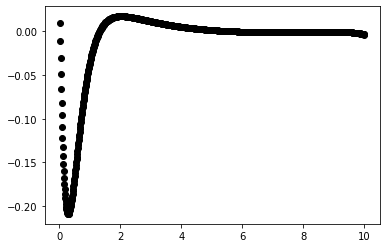

In [15]:
time = [dt*i for i in range(1,N+1)]
for i in range(1, N):
  plt.scatter(time[i], S[i][3], color = 'black')

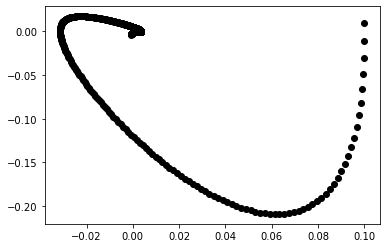

In [16]:
# time = [dt*i for i in range(1,N+1)]
for i in range(1, N):
  plt.scatter(S[i][2], S[i][3], color = 'black')

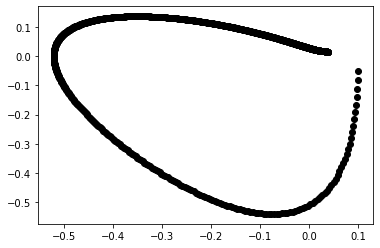

In [17]:
for i in range(1, N):
  plt.scatter(S[i][0], S[i][1], color = 'black')